Universidad Del Valle de Guatemala

Departamento de Computación

Modelación y Simulación

Laboratorio 4

Diana Lucía Fernández Villatoro - 21747

Brandon Rolando Sicay Cumes - 21757

Daniel Esteban Morales Urizar - 21785

# Parte 2 - Ejercicios sobre Números Aleatorios

### Task 1
1. Para diferentes lambdas en [2, 1, 0.5], grafique las distribuciones gamma para cada uno de los casos

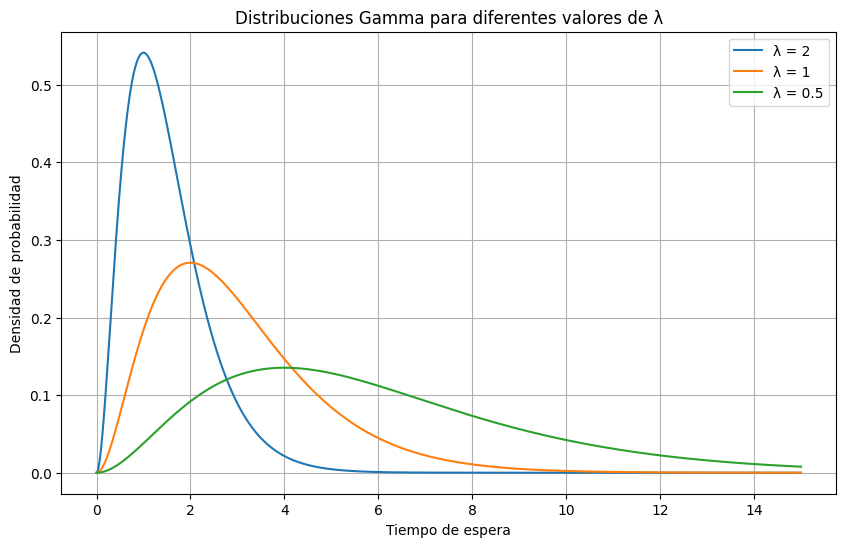

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import gamma

# Definir los parámetros
k = 3  # Tercer evento
lambdas = [2, 1, 0.5]
x = np.linspace(0, 15, 1000)

# Crear la figura para la gráfica
plt.figure(figsize=(10, 6))

# Graficar las distribuciones gamma para diferentes lambdas
for lam in lambdas:
    rv = gamma(a=k, scale=1/lam)
    plt.plot(x, rv.pdf(x), label=f'λ = {lam}')

# Configurar el título y etiquetas de los ejes
plt.title('Distribuciones Gamma para diferentes valores de λ')
plt.xlabel('Tiempo de espera')
plt.ylabel('Densidad de probabilidad')
plt.legend()
plt.grid(True)

# Mostrar la gráfica
plt.show()


 2. **¿Qué conclusiones puede obtener de las gráficas obtenidas en términos de los tiempos de espera y el
número de ocurrencias del evento? ¿Qué relación existe entre el tiempo de espera y el número de
ocurrencias de un evento?**

Gamma representa la tasa actual a la cual ocurre el evento, es este caso el paso de un carro en una calle dada. Mientras que más aumenta Gamma el tiempo de espera para que pase el tercer carro disminuye, esto debido a que mientras mayor el Gamma el evento, o en este caso los carros, pasan más frecuentemente por lo que se necesita menos tiempo para alcanzar el tercer evento.

Para valores Gamma más altos la distribución es más estrecha y más concentrada en tiempos cortos, mientras que en valores bajos la distribución se aplana y se extiende, indicando una mayor variabilidad en los tiempos de espera.

El tiempo de espera promedio depende del número de eventos que se están esperando, es decir, mientras se tenga un mayor número de eventos el caso promedio tiende a aumentar, mientras que si los eventos disminuyen, el tiempo promedio también. Comúnmente en las distribuciones Gamma, se tiene una relación inversa entre el valor Gamma y el tiempo de espera, pues si Gamma aumenta el tiempo de espera disminuye, y viceversa.

### Task 2
Considere las siguientes dos funciones generados de pseudo randoms y responda

**Generador 1**

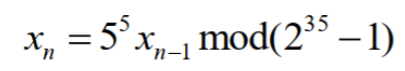

**Generador 2**

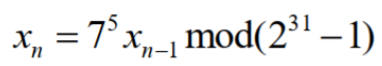

Y considere al generador de números aleatorios uniformes en (0, 1) default de su lenguaje de programación de elección, como un tercer generador de números aleatorios.

### Task 3
Considere la siguiente integral y responda

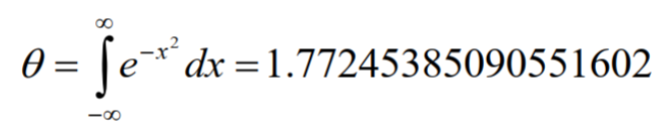

1. ** Transforme la integral a una con límites de 0 a 1, muestre su procedimiento **

In [3]:
import numpy as np

# Función que corresponde a la integral transformada
def integrand(t):
    return np.sqrt(-np.log(t)) / t

# Función para calcular la integral usando el método de Montecarlo
def montecarlo_integration(num_iterations):
    # Generamos números aleatorios entre 0 y 1
    random_samples = np.random.uniform(0, 1, num_iterations)
    
    # Evaluamos la función en estos puntos
    function_values = integrand(random_samples)
    
    # Calculamos el promedio de las evaluaciones
    integral_estimate = np.mean(function_values)
    
    return integral_estimate

# Realizamos la aproximación con diferentes números de iteraciones
iterations = [100, 10000, 100000]
results = {}

for n in iterations:
    result = montecarlo_integration(n)
    results[n] = result
    print(f"Resultado con {n} iteraciones: {result}")



Resultado con 100 iteraciones: 14.87061542170027
Resultado con 10000 iteraciones: 26.069925239138804
Resultado con 100000 iteraciones: 35.89356620232553


### Task 4

In [7]:
# Definimos la función de la integral, pero usando directamente x y y como variables
def integrand(x, y):
    return np.exp(-(x + y))

# Función para calcular la integral usando el método de Montecarlo
def montecarlo_integration(num_iterations):
    # Generamos números aleatorios para x e y entre 0 y 1
    x_random = np.random.uniform(0, 1, num_iterations)
    y_random = np.random.uniform(0, 1, num_iterations)
    
    # Evaluamos la función en estos puntos
    function_values = integrand(x_random, y_random)
    
    # Calculamos el promedio de las evaluaciones
    integral_estimate = np.mean(function_values)
    
    return integral_estimate

# Realizamos la aproximación con diferentes números de iteraciones
iterations = [100, 10000, 100000]
results = {}

for n in iterations:
    result = montecarlo_integration(n)
    results[n] = result
    print(f"Resultado con {n} iteraciones: {result}")


Resultado con 100 iteraciones: 0.3623400418623429
Resultado con 10000 iteraciones: 0.3997404683568038
Resultado con 100000 iteraciones: 0.3993548074042899


# Parte 3 - Ejercicios sobre Generación de V.A P1
### Task 1
Genere muestras aleatorias a partir de una distribución geométrica utilizando el método de transformación inversa.
1. Defina una distribución geométrica objetivo con el parámetro p=0.3
2. Implemente el método de transformación inversa para generar muestras aleatorias a partir de la distribución geométrica
3. Genere una muestra aleatoria de tamaño 1000 a partir de la distribución geométrica
4. Trace un histograma de la muestra generada y compárelo con el PMF teórico de la distribución geométrica

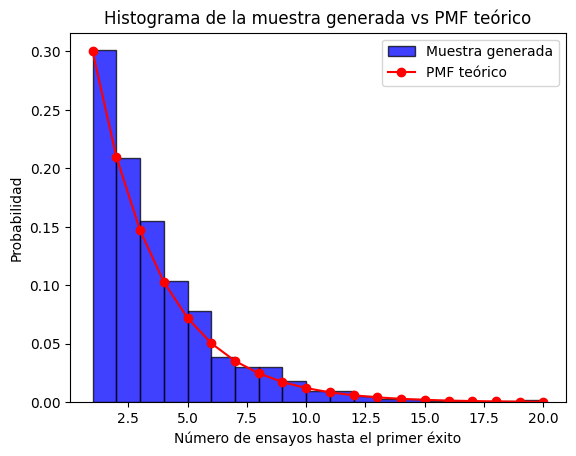

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import math

p = 0.3

def generate_geometric_sample(p, size):
    U = np.random.uniform(0, 1, size)
    sample = np.ceil(np.log(1 - U) / np.log(1 - p))
    return sample

# Generar una muestra de tamaño 1000
sample_size = 1000
sample = generate_geometric_sample(p, sample_size)

# Histograma de la muestra generada
plt.hist(sample, bins=range(1, int(max(sample)) + 1), density=True, alpha=0.75, color='blue', edgecolor='black', label='Muestra generada')

# PMF teórico de la distribución geométrica
x = np.arange(1, int(max(sample)) + 1)
pmf = [(1 - p)**(k - 1) * p for k in x]
plt.plot(x, pmf, 'ro-', label='PMF teórico')

plt.xlabel('Número de ensayos hasta el primer éxito')
plt.ylabel('Probabilidad')
plt.title('Histograma de la muestra generada vs PMF teórico')
plt.legend()
plt.show()

### Task 2
Investigue alguna aplicación del método de transformación inversa e implementenlo
1. Defina la distribución que está utilizando y los parámetros de la misma
2. Implemente el método de transformación inversa para generar muestras aleatorias a partir de la distribución
3. Genere una muestra aleatoria de tamaño 1000 a partir de la distribución usada
4. Trace un histograma de la muestra generada y compárelo con el PMF teórico de la distribución usada

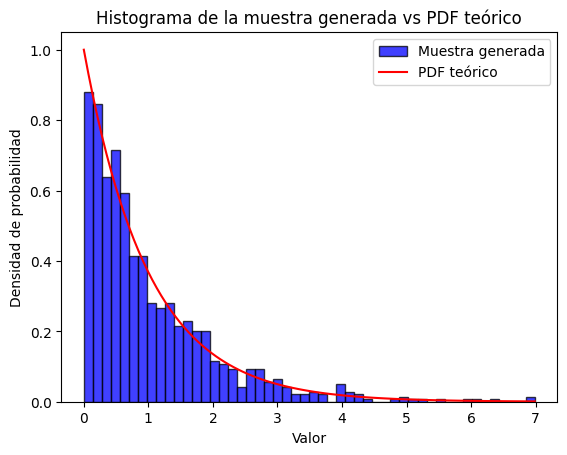

In [3]:
lambda_param = 1.0

def generate_exponential_sample(lambda_param, size):
    U = np.random.uniform(0, 1, size)
    sample = -np.log(1 - U) / lambda_param
    return sample

# Generar una muestra de tamaño 1000
sample_size = 1000
sample = generate_exponential_sample(lambda_param, sample_size)

# Histograma de la muestra generada
plt.hist(sample, bins=50, density=True, alpha=0.75, color='blue', edgecolor='black', label='Muestra generada')

# PDF teórico de la distribución exponencial
x = np.linspace(0, max(sample), 100)
pdf = lambda_param * np.exp(-lambda_param * x)
plt.plot(x, pdf, 'r-', label='PDF teórico')

plt.xlabel('Valor')
plt.ylabel('Densidad de probabilidad')
plt.title('Histograma de la muestra generada vs PDF teórico')
plt.legend()
plt.show()